In [5]:
import qiskit
import numpy as np
import qtm 
import qtm_multiqubit
import constant 

In [3]:
n_qubits = 3
thetas = np.random.uniform(low = 0, high = 2*np.pi, size = 2**(n_qubits + 1) - 2)
print(thetas.shape)

(14,)


In [4]:


get_counter(3)


'000'

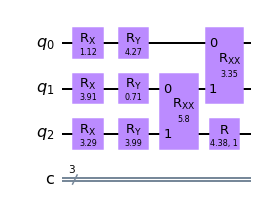

In [5]:
def u_arbitrary(thetas):
    qc = QuantumCircuit(n_qubits, n_qubits)
    qc.rx(thetas[0], 0)
    qc.ry(thetas[1], 0)
    qc.rx(thetas[2], 1)
    qc.ry(thetas[3], 1)
    qc.rx(thetas[4], 2)
    qc.ry(thetas[5], 2)
    qc.rxx(thetas[6], 1, 2)
    qc.rxy(thetas[7], 1, 2)
    qc.rxx(thetas[8], 0, 1)
    # qc.rxy(thetas[9], 0, 1)
    # qc.rxx(thetas[10], 1, 2)
    # qc.rxy(thetas[11], 1, 2)
    return qc
def grad_l_multiqubit(qc, thetas, r, s):
    gradient_l = np.zeros((thetas).shape)
    for i in range(0, len(thetas)):
        thetas1, thetas2 = thetas.copy(), thetas.copy()
        thetas2[i] -= s
        thetas2[i] -= s
        qc1 = u_arbitrary(qc.copy(), thetas1)
        qc2 = u_arbitrary(qc.copy(), thetas2)
        gradient_l[i] = -r*(
            measure(qc1, range(qc1.num_qubits), range(qc1.num_qubits), counter) - 
            measure(qc2, range(qc2.num_qubits), range(qc2.num_qubits), counter))
create_arbitrary_state(thetas).draw(output='mpl')